# C칩digo y Visualizaciones

* Para poder ejecutar las celdas correctamente y visualizar los graficos, es necesario hacerlo de forma secuencial, partiendo desde la importancion de datos.
* Cada secci칩n puede ejecutarse de forma independiente a la otra, en caso de algun problema intente ejecutar nuevamente la Importancion de datos, o las celdas anteriores a la seccion.
* Este Colab fue realizado para el desafio de Alura Latam, mas informaci칩n en el siguiente enlace [Desaf칤o Data Science 1](https://github.com/popex404/Desafio-Data-Science-1)


## Importaci칩n de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar nombre de tienda
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'


tienda.head()

Producto Categor칤a del Producto    Precio  Costo de env칤o  \
0  Asistente virtual           Electr칩nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom칠sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci칩n  \
0      16/01/2021      Pedro Gomez          Bogot치             4   
1      18/05/2022  Beatriz Morales        Medell칤n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell칤n             5   

       M칠todo de pago  Cantidad de cuotas       lat       lon    Tienda  
0  Tarjeta de cr칠dito                   8   4.60971 -74.08175  Tienda 1  
1  Tarjeta de cr칠dito                   4   6.25184 -75.56359  Tienda 1  
2  Tarjeta de cr칠dito                   1  10.39972 -75.51444  Tienda 1  
3               Nequi                   1   3.43722 -76.52250  Tienda 1  
4               Nequi                   1   6.25184 -75.56359  Tienda 1

## 1. An치lisis de facturaci칩n



In [ ]:
# Sumar el total de las ventas por tienda
ingreso_total_tienda1 = tienda['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

print(f"Facturaci칩n total Tienda 1: {ingreso_total_tienda1}")
print(f"Facturaci칩n total Tienda 2: {ingreso_total_tienda2}")
print(f"Facturaci칩n total Tienda 3: {ingreso_total_tienda3}")
print(f"Facturaci칩n total Tienda 4: {ingreso_total_tienda4}")

Facturaci칩n total Tienda 1: 1150880400.0
Facturaci칩n total Tienda 2: 1116343500.0
Facturaci칩n total Tienda 3: 1098019600.0
Facturaci칩n total Tienda 4: 1038375700.0


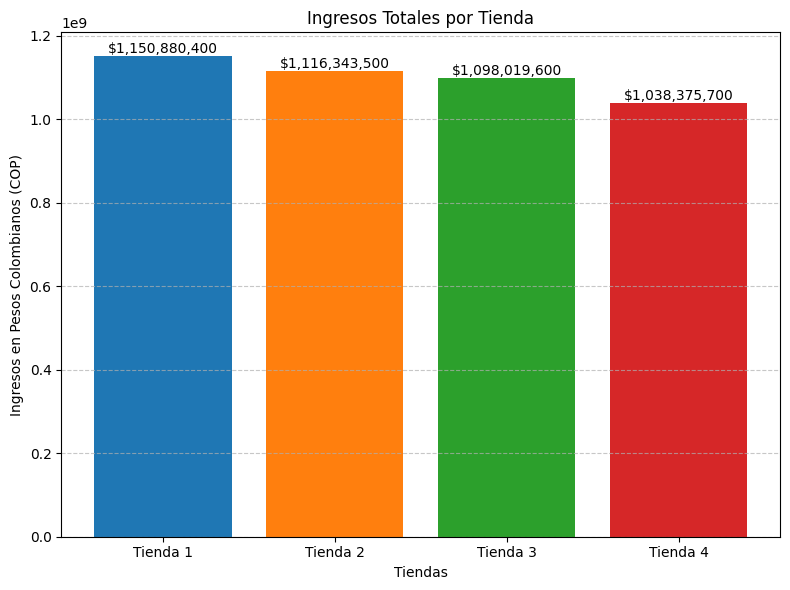

In [ ]:
# Datos para el gr치fico
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_total_tienda1, ingreso_total_tienda2, ingreso_total_tienda3, ingreso_total_tienda4]
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colores distintos para cada barra

# Crear gr치fico de columnas
plt.figure(figsize=(8, 6))
barras = plt.bar(tiendas, ingresos, color=colores)

# Agregar etiquetas a cada barra
for barra, ingreso in zip(barras, ingresos):
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height(), f"${ingreso:,.0f}",
             ha='center', va='bottom', fontsize=10)

# Personalizar gr치fico
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Ingresos en Pesos Colombianos (COP)')
plt.xlabel('Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Podemos observar que la Tienda 1 presenta la mayor rentabilidad y la Tienda 4 la menor, aun as칤 todas las tiendas han logrado superar los mil millones en pesos colombianos.

## 2. Ventas por categor칤a

In [ ]:
# Obtener el listado de categorias por tienda
Categorias_unicas_tienda1 = list(set(tienda['Categor칤a del Producto']))
Categorias_unicas_tienda2 = list(set(tienda2['Categor칤a del Producto']))
Categorias_unicas_tienda3 = list(set(tienda3['Categor칤a del Producto']))
Categorias_unicas_tienda4 = list(set(tienda4['Categor칤a del Producto']))

# Crear una lista de listas con valores repetidos de cada categoria
lista_de_listas_tienda1 = []
lista_de_listas_tienda2 = []
lista_de_listas_tienda3 = []
lista_de_listas_tienda4 = []

for categoria in Categorias_unicas_tienda1:
    lista = [e for e in tienda['Categor칤a del Producto'] if e == categoria]
    lista_de_listas_tienda1.append(lista)
for categoria in Categorias_unicas_tienda2:
    lista = [e for e in tienda2['Categor칤a del Producto'] if e == categoria]
    lista_de_listas_tienda2.append(lista)
for categoria in Categorias_unicas_tienda3:
    lista = [e for e in tienda3['Categor칤a del Producto'] if e == categoria]
    lista_de_listas_tienda3.append(lista)
for categoria in Categorias_unicas_tienda4:
    lista = [e for e in tienda4['Categor칤a del Producto'] if e == categoria]
    lista_de_listas_tienda4.append(lista)

# Creando un diccionario en el que la clave es el nombre de cada categoria unica y el valor es la cantidad de elementos
conteo_valores_tienda1 = {Categorias_unicas_tienda1[i]: len(lista_de_listas_tienda1[i]) for i in range(len(Categorias_unicas_tienda1))}
conteo_valores_tienda2 = {Categorias_unicas_tienda2[i]: len(lista_de_listas_tienda2[i]) for i in range(len(Categorias_unicas_tienda2))}
conteo_valores_tienda3 = {Categorias_unicas_tienda3[i]: len(lista_de_listas_tienda3[i]) for i in range(len(Categorias_unicas_tienda3))}
conteo_valores_tienda4 = {Categorias_unicas_tienda4[i]: len(lista_de_listas_tienda4[i]) for i in range(len(Categorias_unicas_tienda4))}

# Ordenar los diccionarios por las categorias mas vendidas a las menos vendidas.

def ordenar_diccionario(diccionario):
    return dict(sorted(diccionario.items(), key=lambda item: item[1], reverse=True))

# Ordenando cada uno
Ventas_por_Categoria_Tienda1 = ordenar_diccionario(conteo_valores_tienda1)
Ventas_por_Categoria_Tienda2 = ordenar_diccionario(conteo_valores_tienda2)
Ventas_por_Categoria_Tienda3 = ordenar_diccionario(conteo_valores_tienda3)
Ventas_por_Categoria_Tienda4 = ordenar_diccionario(conteo_valores_tienda4)

# Imprimir resultados
print("\nVentas por Categoria en la Tienda 1:\n", Ventas_por_Categoria_Tienda1)
print("\nVentas por Categoria en la Tienda 2:\n", Ventas_por_Categoria_Tienda2)
print("\nVentas por Categoria en la Tienda 3:\n", Ventas_por_Categoria_Tienda3)
print("\nVentas por Categoria en la Tienda 4:\n", Ventas_por_Categoria_Tienda4)


Ventas por Categoria en la Tienda 1:
 {'Muebles': 465, 'Electr칩nicos': 448, 'Juguetes': 324, 'Electrodom칠sticos': 312, 'Deportes y diversi칩n': 284, 'Instrumentos musicales': 182, 'Libros': 173, 'Art칤culos para el hogar': 171}

Ventas por Categoria en la Tienda 2:
 {'Muebles': 442, 'Electr칩nicos': 422, 'Juguetes': 313, 'Electrodom칠sticos': 305, 'Deportes y diversi칩n': 275, 'Instrumentos musicales': 224, 'Libros': 197, 'Art칤culos para el hogar': 181}

Ventas por Categoria en la Tienda 3:
 {'Muebles': 499, 'Electr칩nicos': 451, 'Juguetes': 315, 'Electrodom칠sticos': 278, 'Deportes y diversi칩n': 277, 'Libros': 185, 'Art칤culos para el hogar': 177, 'Instrumentos musicales': 177}

Ventas por Categoria en la Tienda 4:
 {'Muebles': 480, 'Electr칩nicos': 451, 'Juguetes': 338, 'Deportes y diversi칩n': 277, 'Electrodom칠sticos': 254, 'Art칤culos para el hogar': 201, 'Libros': 187, 'Instrumentos musicales': 170}


### 2.a Distribuci칩n de Ventas por Categor칤a

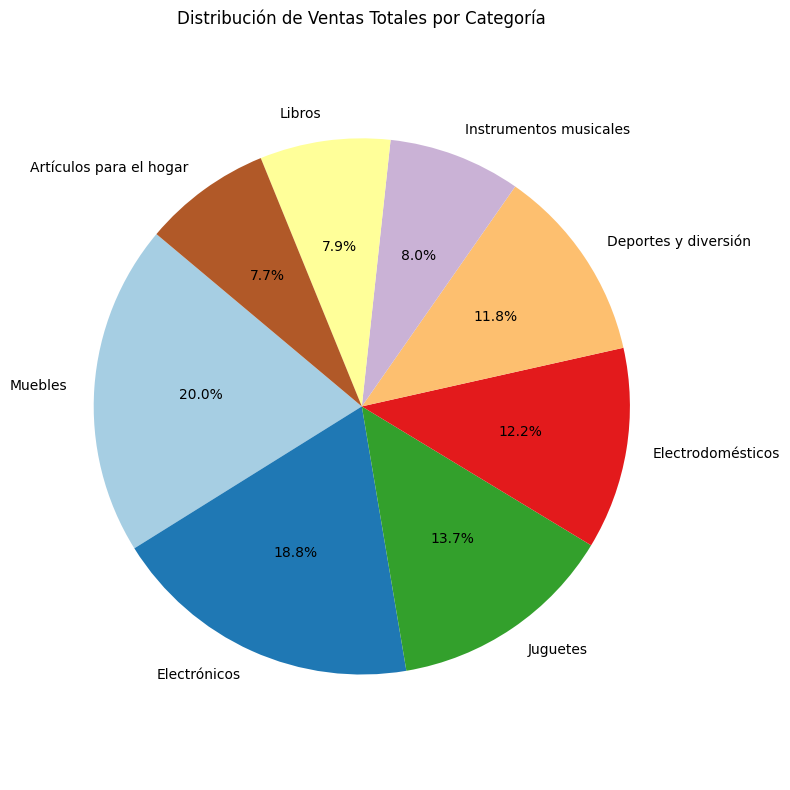

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Categor칤as y colores consistentes
categorias = list(Ventas_por_Categoria_Tienda1.keys())

valores_t1 = [Ventas_por_Categoria_Tienda1[cat] for cat in categorias]
valores_t2 = [Ventas_por_Categoria_Tienda2[cat] for cat in categorias]
valores_t3 = [Ventas_por_Categoria_Tienda3[cat] for cat in categorias]
valores_t4 = [Ventas_por_Categoria_Tienda4[cat] for cat in categorias]


# Gr치fico de torta (sin cambios)
ventas_totales_categoria = {
    cat: Ventas_por_Categoria_Tienda1[cat] +
         Ventas_por_Categoria_Tienda2[cat] +
         Ventas_por_Categoria_Tienda3[cat] +
         Ventas_por_Categoria_Tienda4[cat]
    for cat in categorias
}

labels = list(ventas_totales_categoria.keys())
sizes = list(ventas_totales_categoria.values())
colors = [color_map[cat] for cat in labels]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribuci칩n de Ventas Totales por Categor칤a')
plt.axis('equal')
plt.tight_layout()
plt.show()

Podemos observar que la categoria mas popular son los muebles, ademas que las primeras tres categorias engrosan m치s del 50% de todas las ventas.

### 2.b Ventas de tienda por categor칤a

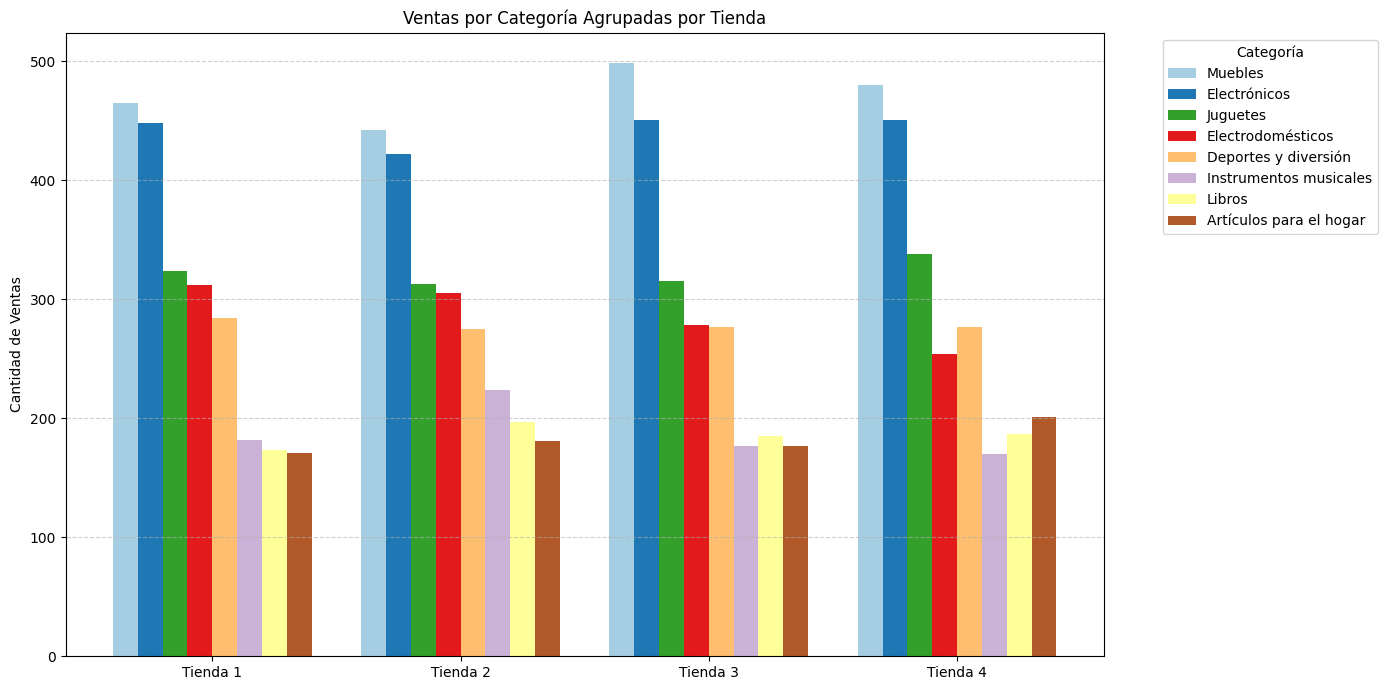

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Paleta de colores
colors = plt.cm.Paired(np.linspace(0, 1, len(categorias)))
color_map = dict(zip(categorias, colors))

# Datos por tienda en una lista por categor칤a
ventas_por_categoria = [valores_t1, valores_t2, valores_t3, valores_t4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
x = np.arange(len(tiendas))

# Configuraci칩n para barras agrupadas
bar_width = 0.1  # ancho de cada barra
fig, ax = plt.subplots(figsize=(14, 7))

# Desplazar barras por categor칤a
for i, cat in enumerate(categorias):
    valores = [ventas_por_categoria[j][i] for j in range(len(tiendas))]
    offset = (i - len(categorias)/2) * bar_width + bar_width / 2
    ax.bar(x + offset, valores, width=bar_width, label=cat, color=color_map[cat])

# Personalizar gr치fico
ax.set_xticks(x)
ax.set_xticklabels(tiendas)
ax.set_ylabel('Cantidad de Ventas')
ax.set_title('Ventas por Categor칤a Agrupadas por Tienda')
ax.legend(title='Categor칤a', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Se puede observar con claridad que los Muebles y Electronicos son las categorias mas populares, mientras que los instrumentos musicales, libros y art칤culos para el hogar son las menos populares, donde dependiendo de la tienda podemos ver como compiten para no quedar 칰ltimo.

## 3. Calificaci칩n promedio de la tienda


In [ ]:
# Funcion para calcular el promedio de una lista
def promedio_lista(lista):
    if len(lista) == 0:
        print("Ingrese una lista no vac칤a")
        return None
    return sum(lista) / len(lista)

# Calcular el promedio de calificacion por tienda
Tienda_avg_Score = round(promedio_lista(tienda['Calificaci칩n']),3)
Tienda2_avg_Score = round(promedio_lista(tienda2['Calificaci칩n']),3)
Tienda3_avg_Score = round(promedio_lista(tienda3['Calificaci칩n']),3)
Tienda4_avg_Score = round(promedio_lista(tienda4['Calificaci칩n']),3)

# Imprimir resultados
print("\nLa puntuacion media de la Tienda 1 es:\n", Tienda_avg_Score)
print("\nLa puntuacion media de la Tienda 2 es:\n", Tienda2_avg_Score)
print("\nLa puntuacion media de la Tienda 3 es:\n", Tienda3_avg_Score)
print("\nLa puntuacion media de la Tienda 4 es:\n", Tienda4_avg_Score)


La puntuacion media de la Tienda 1 es:
 3.977

La puntuacion media de la Tienda 2 es:
 4.037

La puntuacion media de la Tienda 3 es:
 4.048

La puntuacion media de la Tienda 4 es:
 3.996


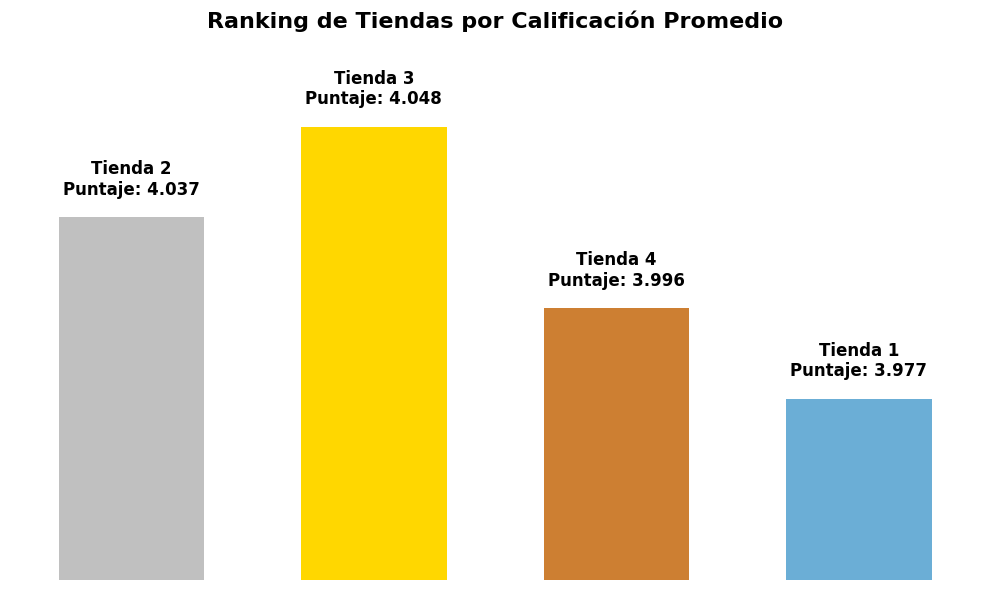

In [ ]:
import matplotlib.pyplot as plt

# Diccionario con las puntuaciones
scores = {
    "Tienda 1": Tienda_avg_Score,
    "Tienda 2": Tienda2_avg_Score,
    "Tienda 3": Tienda3_avg_Score,
    "Tienda 4": Tienda4_avg_Score
}

# Ordenar por puntuaci칩n
ranking = sorted(scores.items(), key=lambda x: x[1], reverse=True)

labels = [r[0] for r in ranking]
values = [r[1] for r in ranking]

# Colores: Oro, Plata, Bronce, Azul suave
colors = ['#FFD700', '#C0C0C0', '#CD7F32', '#6BAED6']
heights = [2.5, 2.0, 1.5, 1.0]
positions = [1, 0, 2, 3]  # Posiciones en X para dar forma de podio

fig, ax = plt.subplots(figsize=(10, 6))

for i, pos in enumerate(positions):
    ax.bar(pos, heights[i], color=colors[i], width=0.6)
    ax.text(pos, heights[i] + 0.1,
            f"{labels[i]}\nPuntaje: {values[i]:.3f}",
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_xlim(-0.5, 3.5)
ax.set_ylim(0, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Ranking de Tiendas por Calificaci칩n Promedio', fontsize=16, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

El grafico esta dise침ado para poder exagerar las diferencias entre las calificaciones, sin embargo todas las tiendas cumplen con casi el mismo desempe침o al tener una nota bastante cercana a 4.

## 4. Productos m치s y menos vendidos

In [ ]:
# Obtener el listado de productos por tienda
Productos_unicos_tienda1 = list(set(tienda['Producto']))
Productos_unicos_tienda2 = list(set(tienda2['Producto']))
Productos_unicos_tienda3 = list(set(tienda3['Producto']))
Productos_unicos_tienda4 = list(set(tienda4['Producto']))

# Crear una lista de listas con valores repetidos de cada producto
listas_tienda1 = []
listas_tienda2 = []
listas_tienda3 = []
listas_tienda4 = []

for producto in Productos_unicos_tienda1:
    lista = [e for e in tienda['Producto'] if e == producto]
    listas_tienda1.append(lista)
for producto in Productos_unicos_tienda2:
    lista = [e for e in tienda2['Producto'] if e == producto]
    listas_tienda2.append(lista)
for producto in Productos_unicos_tienda3:
    lista = [e for e in tienda3['Producto'] if e == producto]
    listas_tienda3.append(lista)
for producto in Productos_unicos_tienda4:
    lista = [e for e in tienda4['Producto'] if e == producto]
    listas_tienda4.append(lista)

# Creando un diccionario en el que la clave es el nombre de cada producto unico y el valor es la cantidad de ventas
conteo_tienda1 = {Productos_unicos_tienda1[i]: len(listas_tienda1[i]) for i in range(len(Productos_unicos_tienda1))}
conteo_tienda2 = {Productos_unicos_tienda2[i]: len(listas_tienda2[i]) for i in range(len(Productos_unicos_tienda2))}
conteo_tienda3 = {Productos_unicos_tienda3[i]: len(listas_tienda3[i]) for i in range(len(Productos_unicos_tienda3))}
conteo_tienda4 = {Productos_unicos_tienda4[i]: len(listas_tienda4[i]) for i in range(len(Productos_unicos_tienda4))}

# Ordenar los diccionarios por los productos mas vendidas a los menos vendidas.

def ordenar_diccionario(diccionario):
    return dict(sorted(diccionario.items(), key=lambda item: item[1], reverse=True))

# Ordenando cada uno
Ventas_por_Producto_Tienda1 = ordenar_diccionario(conteo_tienda1)
Ventas_por_Producto_Tienda2 = ordenar_diccionario(conteo_tienda2)
Ventas_por_Producto_Tienda3 = ordenar_diccionario(conteo_tienda3)
Ventas_por_Producto_Tienda4 = ordenar_diccionario(conteo_tienda4)

# Imprimir resultados
print("\nVentas por Producto en la Tienda 1:\n", Ventas_por_Producto_Tienda1)
print("\nVentas por Producto en la Tienda 2:\n", Ventas_por_Producto_Tienda2)
print("\nVentas por Producto en la Tienda 3:\n", Ventas_por_Producto_Tienda3)
print("\nVentas por Producto en la Tienda 4:\n", Ventas_por_Producto_Tienda4)


Ventas por Producto en la Tienda 1:
 {'Armario': 60, 'TV LED UHD 4K': 60, 'Microondas': 60, 'Secadora de ropa': 58, 'Mesa de noche': 56, 'Bloques de construcci칩n': 56, 'Bal칩n de baloncesto': 55, 'Vaso t칠rmico': 54, 'Bicicleta': 54, 'Refrigerador': 54, 'Impresora': 54, 'Bater칤a': 53, 'Cuberter칤a': 52, 'Carrito de control remoto': 52, 'Modelado predictivo': 51, 'Auriculares': 50, 'Ajedrez de madera': 49, 'Iphone 15': 49, 'Lavavajillas': 48, 'Guitarra el칠ctrica': 47, 'Lavadora de ropa': 47, 'Silla de oficina': 46, 'Guitarra ac칰stica': 46, 'Sof치 reclinable': 46, 'Estufa': 45, 'Cubo m치gico 8x8': 44, 'Cama box': 44, 'Kit de bancas': 44, 'Mesa de centro': 44, 'Smart TV': 44, 'Cama king': 44, 'Smartwatch': 43, 'Set de ollas': 43, 'Juego de mesa': 43, 'Dashboards con Power BI': 42, 'Bal칩n de voleibol': 42, 'Tablet ABXY': 42, 'Sill칩n': 41, 'Set de vasos': 41, 'Iniciando en programaci칩n': 41, 'Mu침eca beb칠': 40, 'Cuerda para saltar': 40, 'Mesa de comedor': 40, 'Asistente virtual': 40, 'Dinosaurio

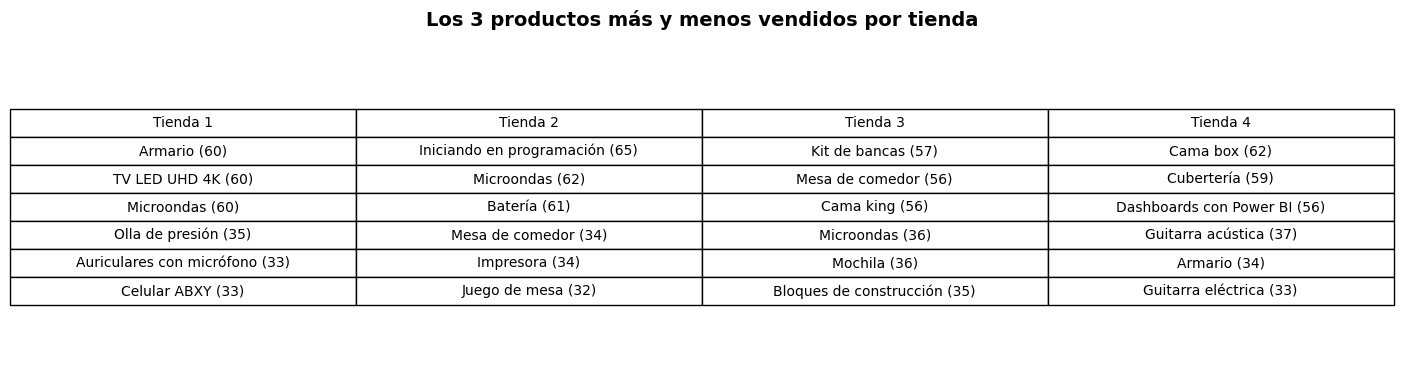

In [ ]:
import matplotlib.pyplot as plt

# Funci칩n para extraer los top y bottom 3 productos con orden correcto
def extraer_top_y_bottom_ordenados(diccionario):
    items = list(diccionario.items())
    top3 = items[:3]  # ya vienen en orden descendente
    bottom3 = items[-3:]  # en orden ascendente, as칤 que lo dejamos tal cual
    return top3 + bottom3

# Extraer los productos de cada tienda
productos_tienda1 = extraer_top_y_bottom_ordenados(Ventas_por_Producto_Tienda1)
productos_tienda2 = extraer_top_y_bottom_ordenados(Ventas_por_Producto_Tienda2)
productos_tienda3 = extraer_top_y_bottom_ordenados(Ventas_por_Producto_Tienda3)
productos_tienda4 = extraer_top_y_bottom_ordenados(Ventas_por_Producto_Tienda4)

# Preparar la tabla (sin columna de apoyo)
tabla_datos = []

for i in range(6):
    fila = [
        f"{productos_tienda1[i][0]} ({productos_tienda1[i][1]})",
        f"{productos_tienda2[i][0]} ({productos_tienda2[i][1]})",
        f"{productos_tienda3[i][0]} ({productos_tienda3[i][1]})",
        f"{productos_tienda4[i][0]} ({productos_tienda4[i][1]})"
    ]
    tabla_datos.append(fila)

# Crear la tabla con matplotlib
fig, ax = plt.subplots(figsize=(14, 4))
ax.axis('off')

tabla = ax.table(cellText=tabla_datos,
                 colLabels=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
                 cellLoc='center',
                 rowLoc='center',
                 loc='center')

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.5)

plt.title("Los 3 productos m치s y menos vendidos por tienda", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

*   Podemos observar que existen distintas preferencias por tienda, como por ejemplo la mesa de comedor que esta entre las mas populares de la tienda 3 mientras que en la tienda 2 esta entre las menos populares, el microondas tambien presenta la misma tendencia entre la tienda 2 y la tienda 3.
*   **Existe una correlacion entre los productos m치s y menos vendidos**, donde los mas populares alcanzan un total de 56-65 ventas mientras que los menos populares entre 32-37 ventas **manteniendo una distribucion casi uniforme**.


## 5. Env칤o promedio por tienda

In [ ]:
# Funcion para calcular el promedio de una lista
def promedio_lista(lista):
    if len(lista) == 0:
        print("Ingrese una lista no vac칤a")
        return None
    return sum(lista) / len(lista)

# Calcular el promedio de envio por tienda
Tienda_avg_Envio = round(promedio_lista(tienda['Costo de env칤o']),2)
Tienda2_avg_Envio = round(promedio_lista(tienda2['Costo de env칤o']),2)
Tienda3_avg_Envio = round(promedio_lista(tienda3['Costo de env칤o']),2)
Tienda4_avg_Envio = round(promedio_lista(tienda4['Costo de env칤o']),2)

# Imprimir resultados
print("\nEl coste de env칤o promedio de la Tienda 1 es:\n", Tienda_avg_Envio)
print("\nEl coste de env칤o promedio de la Tienda 2 es:\n", Tienda2_avg_Envio)
print("\nEl coste de env칤o promedio de la Tienda 3 es:\n", Tienda3_avg_Envio)
print("\nEl coste de env칤o promedio de la Tienda 4 es:\n", Tienda4_avg_Envio)


El coste de env칤o promedio de la Tienda 1 es:
 26018.61

El coste de env칤o promedio de la Tienda 2 es:
 25216.24

El coste de env칤o promedio de la Tienda 3 es:
 24805.68

El coste de env칤o promedio de la Tienda 4 es:
 23459.46


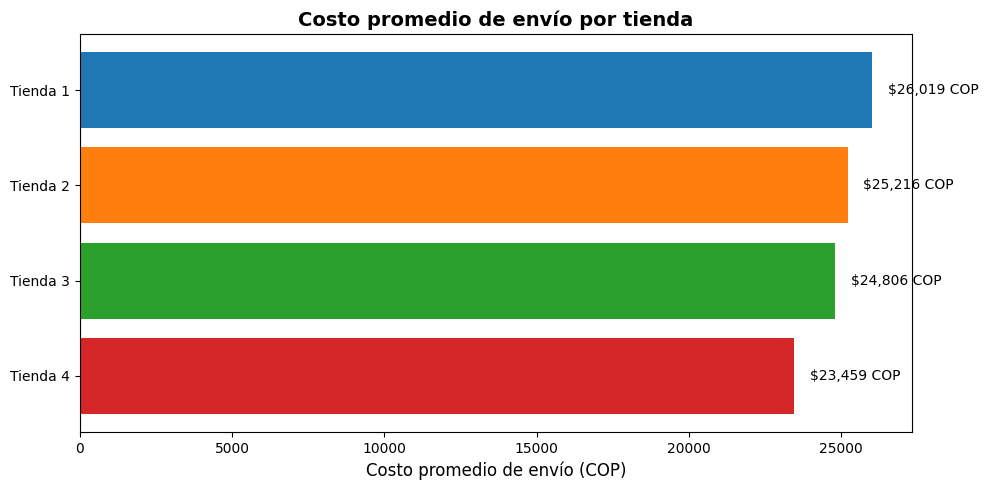

In [ ]:
import matplotlib.pyplot as plt

# Datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos_envio = [Tienda_avg_Envio, Tienda2_avg_Envio, Tienda3_avg_Envio, Tienda4_avg_Envio]
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Crear gr치fico de barras horizontales
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(tiendas, costos_envio, color=colores)

# A침adir etiquetas con los valores
for bar in bars:
    width = bar.get_width()
    ax.text(width + 500, bar.get_y() + bar.get_height() / 2,
            f"${width:,.0f} COP", va='center', fontsize=10)

# T칤tulo y etiquetas
ax.set_xlabel('Costo promedio de env칤o (COP)', fontsize=12)
ax.set_title('Costo promedio de env칤o por tienda', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Para que Tienda 1 aparezca arriba

plt.tight_layout()
plt.show()

La diferencia de coste de envio es bastante parecida donde La tienda 4 es un poco menos de 3000 $COP mas barata que la Tienda 1.

## 6. Analisis del desempe침o Geogr치fico

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Unir todos los datos
datos = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Crear mapa centrado en Colombia
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Heatmap de ventas
heat_data = datos[['lat', 'lon']].values.tolist()
HeatMap(heat_data, radius=10, blur=7).add_to(mapa)

# Estad칤sticas por tienda
info_tiendas = datos.groupby('Tienda').agg({
    'lat': 'mean',
    'lon': 'mean',
    'Precio': ['sum', 'count'],
    'Calificaci칩n': 'mean'
}).reset_index()
info_tiendas.columns = ['Tienda', 'lat', 'lon', 'Total Ventas', 'Numero Ventas', 'Prom Calificaci칩n']

# Categor칤a m치s popular y rentable
categorias = datos.groupby(['Tienda', 'Categor칤a del Producto']).agg({
    'Precio': ['sum', 'count']
}).reset_index()
categorias.columns = ['Tienda', 'Categor칤a', 'Total Categoria', 'Numero Categoria']

info_tiendas['Categor칤a Popular'] = ''
info_tiendas['Ventas Populares'] = 0
info_tiendas['Monto Populares'] = 0
info_tiendas['Categor칤a Rentable'] = ''
info_tiendas['Ventas Rentables'] = 0
info_tiendas['Monto Rentables'] = 0

for i, row in info_tiendas.iterrows():
    tienda = row['Tienda']
    df_cat = categorias[categorias['Tienda'] == tienda]
    popular = df_cat.sort_values('Numero Categoria', ascending=False).iloc[0]
    rentable = df_cat.sort_values('Total Categoria', ascending=False).iloc[0]
    info_tiendas.at[i, 'Categor칤a Popular'] = popular['Categor칤a']
    info_tiendas.at[i, 'Ventas Populares'] = popular['Numero Categoria']
    info_tiendas.at[i, 'Monto Populares'] = popular['Total Categoria']
    info_tiendas.at[i, 'Categor칤a Rentable'] = rentable['Categor칤a']
    info_tiendas.at[i, 'Ventas Rentables'] = rentable['Numero Categoria']
    info_tiendas.at[i, 'Monto Rentables'] = rentable['Total Categoria']

# Agregar pines con resumen de cada tienda
for _, row in info_tiendas.iterrows():
    popup_text = f"""
    <b>{row['Tienda']}</b><br>
    Total ventas: ${int(row['Total Ventas']):,}<br>
    N칰mero de ventas: {row['Numero Ventas']}<br>
    Categor칤a m치s popular: {row['Categor칤a Popular']} ({row['Ventas Populares']} ventas, ${int(row['Monto Populares']):,})<br>
    Categor칤a m치s rentable: {row['Categor칤a Rentable']} ({row['Ventas Rentables']} ventas, ${int(row['Monto Rentables']):,})<br>
    Calificaci칩n promedio: {round(row['Prom Calificaci칩n'], 2)}
    """
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color='blue', icon='shopping-cart', prefix='fa')
    ).add_to(mapa)

# Ventas por ciudad
ventas_ciudad = datos.groupby('Lugar de Compra')['Precio'].sum().reset_index().sort_values(by='Precio', ascending=False)
ventas_ciudad['Precio'] = ventas_ciudad['Precio'].apply(lambda x: f"${x:,.0f}")

# Calificaciones por ciudad
calificaciones_ciudad = datos.groupby('Lugar de Compra')['Calificaci칩n'].mean().reset_index()
calificaciones_ciudad['Calificaci칩n'] = calificaciones_ciudad['Calificaci칩n'].round(3)
calificaciones_ciudad = calificaciones_ciudad.sort_values(by='Calificaci칩n', ascending=False)

# Mostrar resultados
print("游댳 Ventas por ciudad (COP):")
print(ventas_ciudad.to_string(index=False))
print("\n游댳 Calificaci칩n promedio por ciudad:")
print(calificaciones_ciudad.to_string(index=False))

游댳 Ventas por ciudad (COP):
Lugar de Compra         Precio
         Bogot치 $1,814,858,300
       Medell칤n $1,096,669,200
           Cali   $506,526,100
        Pereira   $225,927,300
   Barranquilla   $132,040,500
      Cartagena   $102,376,700
         C칰cuta    $99,369,100
    Bucaramanga    $90,573,300
       Riohacha    $73,879,700
        Leticia    $67,149,900
    Santa Marta    $53,100,500
          Pasto    $49,014,300
          Neiva    $20,898,000
      Manizales    $19,367,900
  Villavicencio    $13,333,600
         Soacha    $12,317,700
        Armenia    $12,242,900
        In칤rida     $8,087,900
     Valledupar     $5,886,300

游댳 Calificaci칩n promedio por ciudad:
Lugar de Compra  Calificaci칩n
          Pasto         4.149
         Bogot치         4.114
     Valledupar         4.071
           Cali         4.047
      Cartagena         4.021
        Pereira         4.014
    Bucaramanga         3.978
         C칰cuta         3.941
       Medell칤n         3.927
        Letici

*   Las ciudades de Bogot치 y Medellin son las que mas dinero han gastado en las tiendas, lo cual es de esperar ya que cuentan con la mayor densidad demografica.
*   Podemos observar que Valledupar es la que menos ha comprado sin embargo se encuentra entre las mejores calificadas
*   La gente de Armenia es la que ha estado menos satisfechas en base a sus calificaciones.

### 6.a Mapa Interactivo con la Densidad de Ventas (Heatmap)

In [ ]:
# Es necesario compilar el codigo anterior, para que el mapa cargue.

mapa

* Podemos observar que las areas mas rojas y con mas actividad estan en Bogot치, sin embargo es posible observar ventas a lo largo de todo el pa칤s.

* Las tiendas no poseen una ubicacion fija exactamente, sino que se obtuvo a traves de un promedio en base a las ventas, sin embargo si hace zoom es posible observar un resumen de actividad para cada tienda.

# Informe


## **Prop칩sito del an치lisis**
El objetivo de este desaf칤o es asistir al se침or Juan en la toma de decisi칩n sobre cu치l de sus cuatro tiendas deber칤a vender para invertir en un nuevo negocio. Para ello, se evaluar치 el desempe침o de cada tienda a partir de diversos indicadores, permitiendo que la decisi칩n est칠 fundamentada en datos y an치lisis objetivos.


## **Desarrollo del an치lisis**

Identificamos que el se침or Juan posee 4 tiendas con actividades de ventas en distintas ciudades de Colombia, ofreciendo una variedad de distintos productos como electrodomesticos, muebles, juguetes o hasta instrumentos musicales.

Y los ingresos totales de esas tiendas son

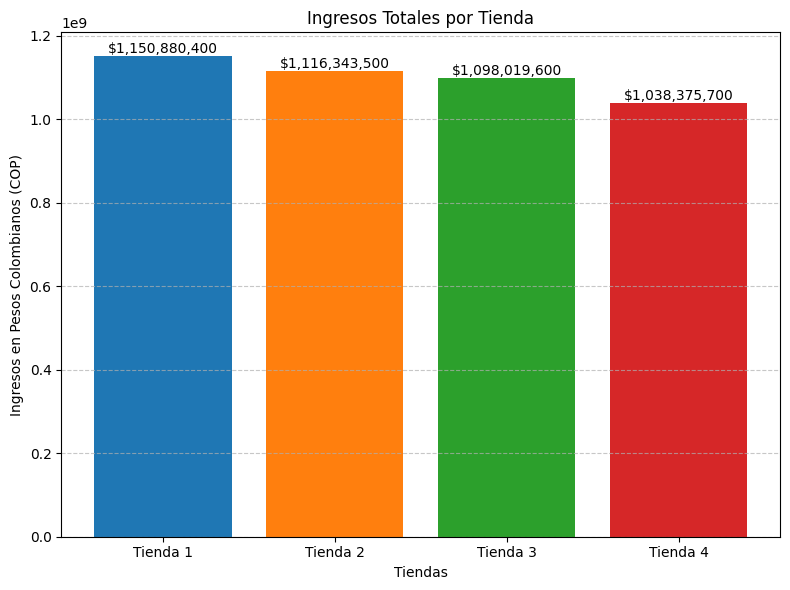

Por otro lado la distribucion de ventas de cada tienda por categoria es

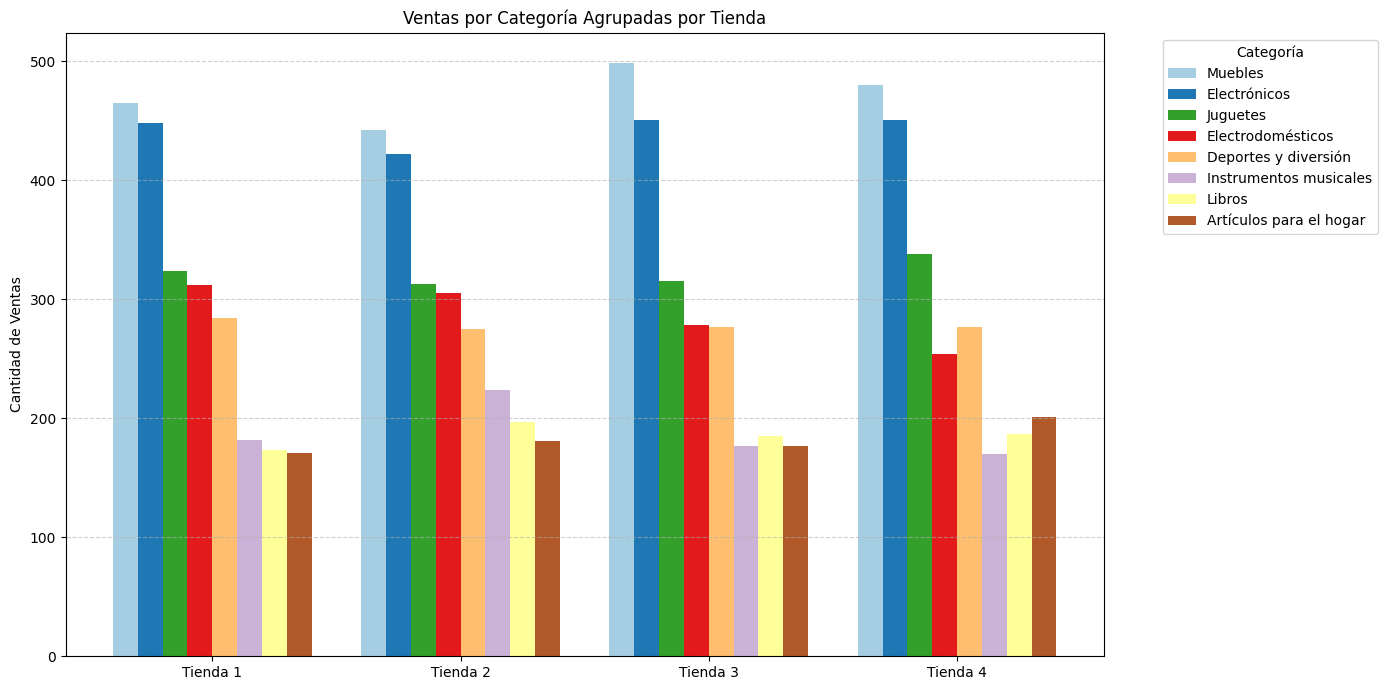

Podemos notar que aunque la Tienda 1 y 2 poseen la Mayor rentabilidad en ingresos, las ventas de la tienda 3 y 4 parecen ser superiores.

Por otro lado podemos ver que los muebles, electronicos y juguetes dominan las ventas, como se puede apreciar en el grafico de barras y tambien en el proximo:

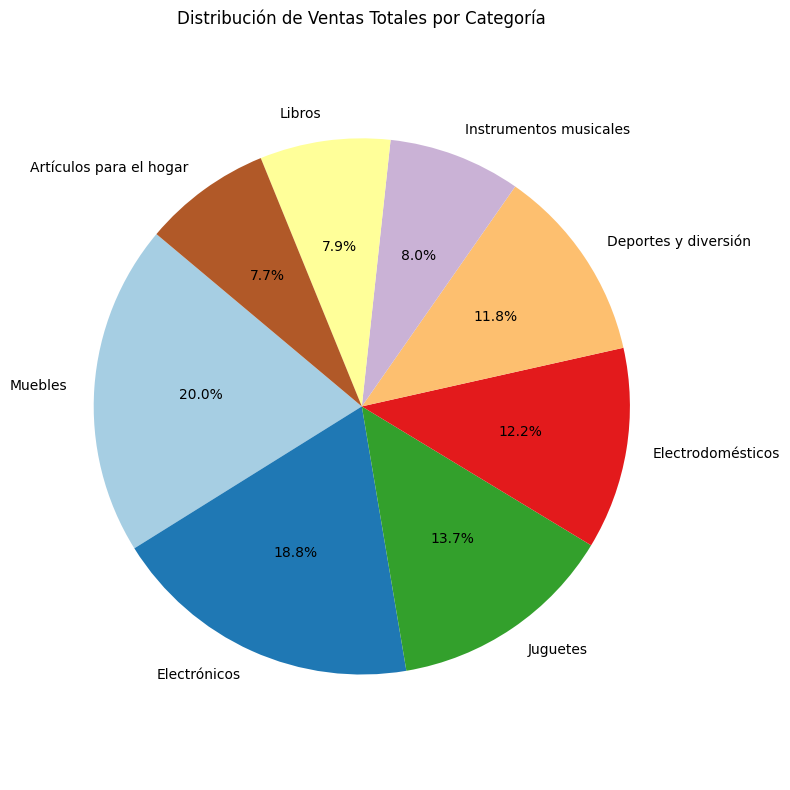

Uno podria pensar que los productos las categorias mas populares son las mas vendidas, pero podemos notar que hay ciertas excepciones que se presentan en la siguiente tabla

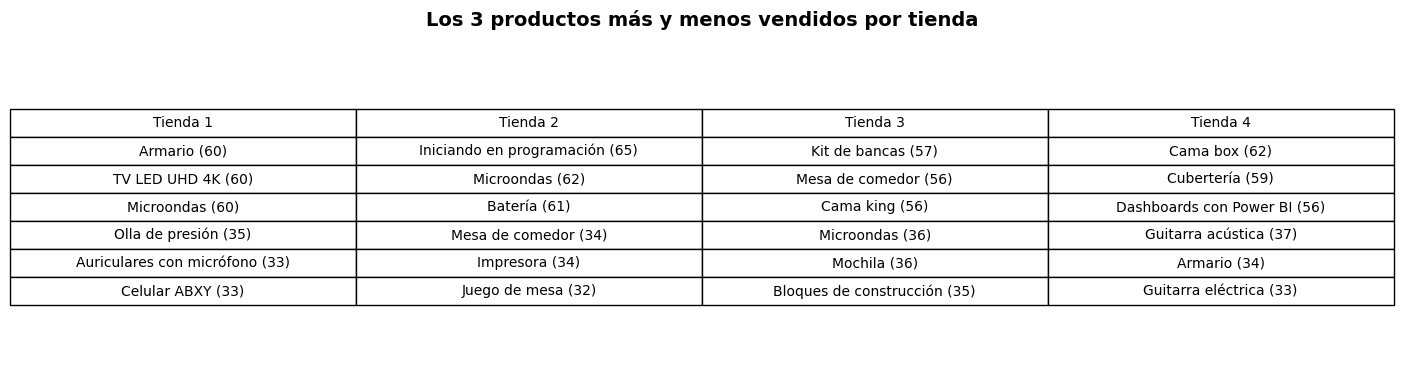

Donde podemos ver que ciertos Electrodomesticos como los Microondas son bastantes populares en la tienda 1 y 2, mientras que en la tienda 3 no lo es tanto, lo mismo ocurre con el Armario que es el mas vendido en la tienda 1 mientras que la tienda 4 uno de los peores.

Estos productos como el Armario o el Microondas son cruciales en el exito de rentabilidad de las tiendas 1 y 2.

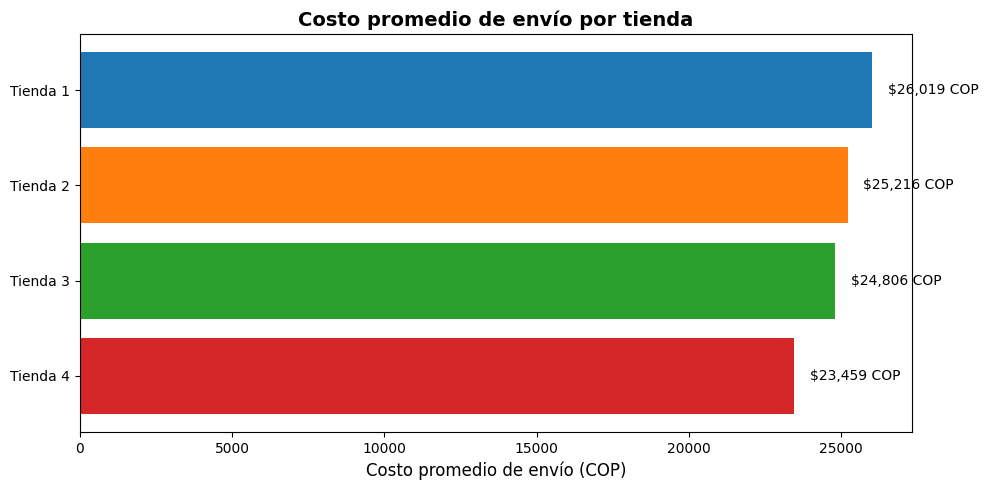

Otro factor que incide en la rentabilidad son los costes de envio, donde las tiendas que presentan la mayor rentabilidad son tambien las que tienen el mayor costo promedio de envio.

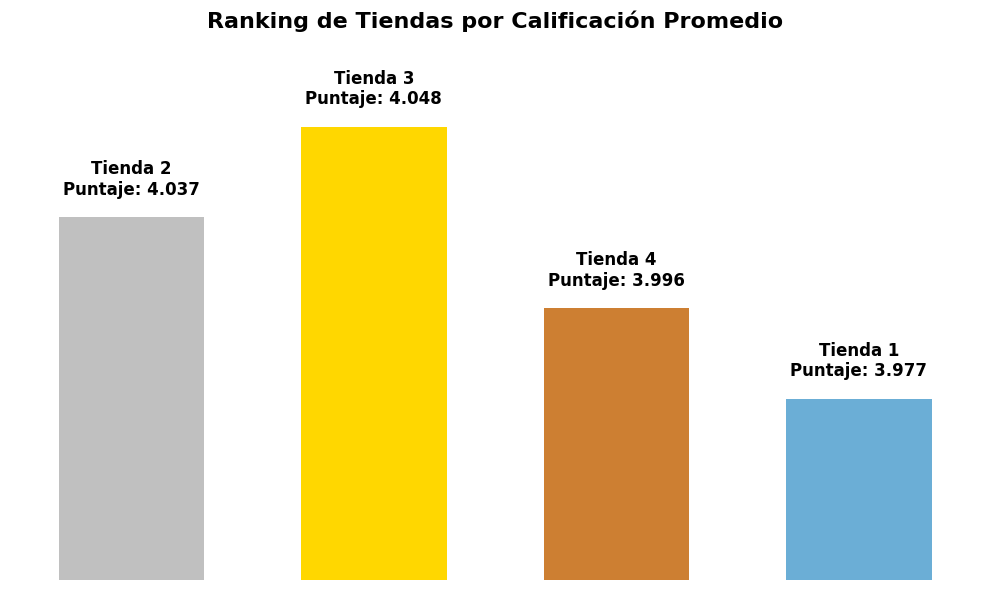

Podemos observar que de todas las tiendas la peor evaluada es la Tienda 1, mientras la tienda 3 es la mejor. Aunque la diferencia es bastante peque침a y todas las tiendas tienen un puntaje cercano a 4.

Finalmente es posible ver un mapa interactivo en la seccion "Analisis del desempe침o Geografico" donde las ciudades de Bogot치 y Medell칤n son las mas activas en pedidos.

## **Conclusi칩n**

El se침or Juan deber칤a vender la Tienda 4, ya que es la que menos rentabilidad tiene, y puede estar relacionado a que es la que menos electrodomesticos ha vendido en comparaci칩n al resto de tiendas.

Si bien la tienda 4 posee una mejor calificacion en promedio que la tienda 1, es una diferencia bastante peque침a del orden de los decimales y la tienda 1 es la que mas rentabilidad ofrece.